# Section 1: "MLP - Basic Image Classification"



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
data_dir = '/content/drive/MyDrive/data/Rice'
classes = sorted(os.listdir(data_dir))
num_classes = len(classes)
img_size = 32


In [ ]:
X, y = [], []

from tqdm import tqdm  # pip install tqdm


for idx, label in enumerate(classes):
    folder_path = os.path.join(data_dir, label)
    if os.path.isdir(folder_path):
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {label}"):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)

                # Check if image is loaded properly
                if img is None:
                    print(f"Skipped corrupted or unreadable image: {img_path}")
                    continue

                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0  # Normalize
                X.append(img)
                y.append(idx)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")


Loading Karacadag: 100%|██████████| 15000/15000 [05:07<00:00, 48.76it/s] 


In [ ]:
# Save the arrays
np.save(os.path.join(data_dir, "X.npy"), X)
np.save(os.path.join(data_dir, "y.npy"), y)

In [ ]:
X = np.load("/content/drive/MyDrive/data/Rice/X.npy")
y = np.load("/content/drive/MyDrive/data/Rice/y.npy")

In [ ]:
X = np.array(X)
y = to_categorical(y, num_classes=len(classes))

In [ ]:
# Train/Val/Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))

####MLP Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model1 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

####Deeper MLP

In [ ]:
model2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)
history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)

Epoch 1/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9141 - loss: 0.2559 - val_accuracy: 0.9709 - val_loss: 0.0855
Epoch 2/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9732 - loss: 0.0792 - val_accuracy: 0.9694 - val_loss: 0.0918
Epoch 3/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0695 - val_accuracy: 0.9758 - val_loss: 0.0731
Epoch 4/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0524 - val_accuracy: 0.9723 - val_loss: 0.0821
Epoch 5/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0517 - val_accuracy: 0.9790 - val_loss: 0.0628
Epoch 6/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9816 - val_loss: 0.0545
Epoch 7/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0404 - val_accuracy: 0.9835 - val_loss: 0.0523
Epoch 8/15
1642/1642 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0368 -

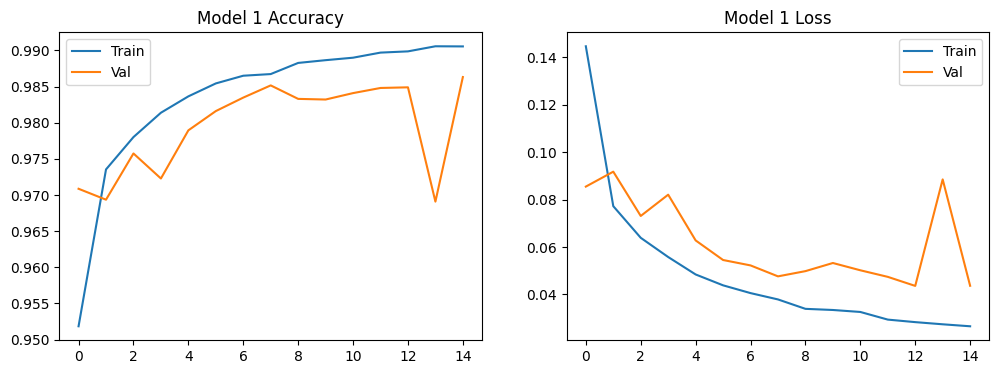

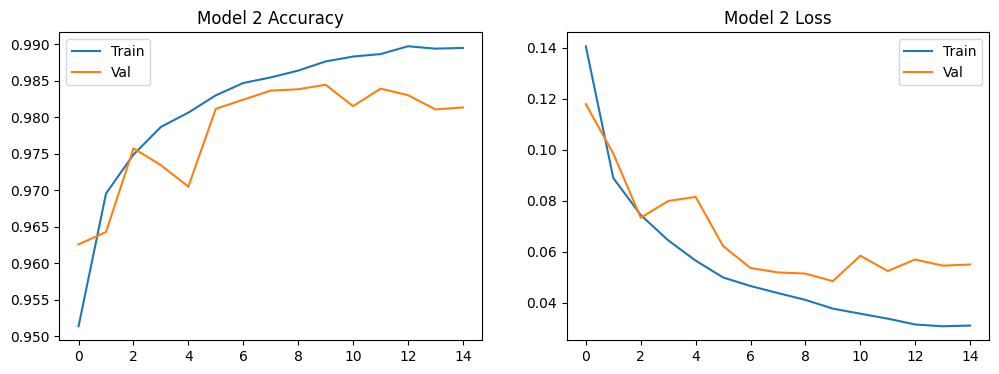

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()

plot_metrics(history1, 'Model 1')
plot_metrics(history2, 'Model 2')

# Section 2: "CNN - Advanced Image Classification"


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm  # pip install tqdm
tf.config.run_functions_eagerly(True)

In [ ]:
# Set the paths to your dataset
train_dir = '/content/drive/MyDrive/data/Plant/Train'
valid_dir = '/content/drive/MyDrive/data/Plant/Validation'
test_dir = '/content/drive/MyDrive/data/Plant/Test'

classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

In [ ]:
def load_images_from_dir(directory, image_size=(128, 128)):
    images = []
    labels = []

    # Automatically get class names (folder names)
    class_names = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])

    for idx, label in enumerate(class_names):
        folder_path = os.path.join(directory, label)
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {label}"):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)

                # Check if image is loaded properly
                if img is None:
                    print(f"Skipped corrupted or unreadable image: {img_path}")
                    continue

                img = cv2.resize(img, image_size)
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels), class_names

In [ ]:
# Load training, validation, and test data
train_X, train_y, class_names = load_images_from_dir(train_dir)
val_X, val_y, _ = load_images_from_dir(valid_dir)
test_X, test_y, _ = load_images_from_dir(test_dir)

In [ ]:
# Save arrays
np.save('/content/drive/MyDrive/data/Plant/train_X.npy', train_X)
np.save('/content/drive/MyDrive/data/Plant/train_y.npy', train_y)
np.save('/content/drive/MyDrive/data/Plant/val_X.npy', val_X)
np.save('/content/drive/MyDrive/data/Plant/val_y.npy', val_y)
np.save('/content/drive/MyDrive/data/Plant/test_X.npy', test_X)
np.save('/content/drive/MyDrive/data/Plant/test_y.npy', test_y)
np.save('/content/drive/MyDrive/data/Plant/class_names.npy', np.array(class_names))

In [ ]:
# Load arrays
train_X = np.load('/content/drive/MyDrive/data/Plant/train_X.npy')
train_y = np.load('/content/drive/MyDrive/data/Plant/train_y.npy')
val_X = np.load('/content/drive/MyDrive/data/Plant/val_X.npy')
val_y = np.load('/content/drive/MyDrive/data/Plant/val_y.npy')
test_X = np.load('/content/drive/MyDrive/data/Plant/test_X.npy')
test_y = np.load('/content/drive/MyDrive/data/Plant/test_y.npy')
class_names = np.load('/content/drive/MyDrive/data/Plant/class_names.npy')


In [ ]:
# Get class names
print(class_names)
num_classes = len(test_y)
print("Detected Classes:", num_classes)

['Healthy' 'Powdery' 'Rust']
Detected Classes: 150


In [ ]:
# One-hot encode labels
num_classes = len(class_names)
y_train = to_categorical(train_y, num_classes)
y_val = to_categorical(val_y, num_classes)
y_test = to_categorical(test_y, num_classes)


#### CNN Model Architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, Flatten
from tensorflow.keras.layers import Input

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
    ])


In [ ]:
model.summary()

#### Deeper CNN

In [ ]:
model2 = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [ ]:
model2.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Use a smaller learning rate
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Train & Eval

In [ ]:

# Train Model 1
history1 = model.fit(
    train_X, y_train,
    epochs=50,
    validation_data=(val_X, y_val),
    callbacks=[early_stopping]
)

# Train Model 2
history2 = model2.fit(
    train_X, y_train,
    epochs=50,
    validation_data=(val_X, y_val),
    callbacks=[early_stopping]
)

# Evaluate models on test set
test_loss_1, test_acc_1 = model.evaluate(test_X, y_test)
test_loss_2, test_acc_2 = model2.evaluate(test_X, y_test)

print(f'Model 1 Test Accuracy: {test_acc_1}')
print(f'Model 2 Test Accuracy: {test_acc_2}')

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 985ms/step - accuracy: 0.3983 - loss: 1.6118 - val_accuracy: 0.5667 - val_loss: 0.7496
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 987ms/step - accuracy: 0.7677 - loss: 0.5523 - val_accuracy: 0.7500 - val_loss: 0.6260
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 992ms/step - accuracy: 0.8604 - loss: 0.3625 - val_accuracy: 0.7667 - val_loss: 0.6231
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 980ms/step - accuracy: 0.9313 - loss: 0.2379 - val_accuracy: 0.8333 - val_loss: 0.4047
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9504 - loss: 0.1532 - val_accuracy: 0.8833 - val_loss: 0.3276
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 982ms/step - accuracy: 0.9586 - loss: 0.1101 - val_accuracy: 0.8833 - val_loss: 0.2876
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 936ms/step - accuracy: 0.9705 - loss: 0.1103 - val_accuracy: 0.8667 - val_loss: 0.3263
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 932ms/step - accuracy: 0.9908 - loss: 0.0473 - val_accurac

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

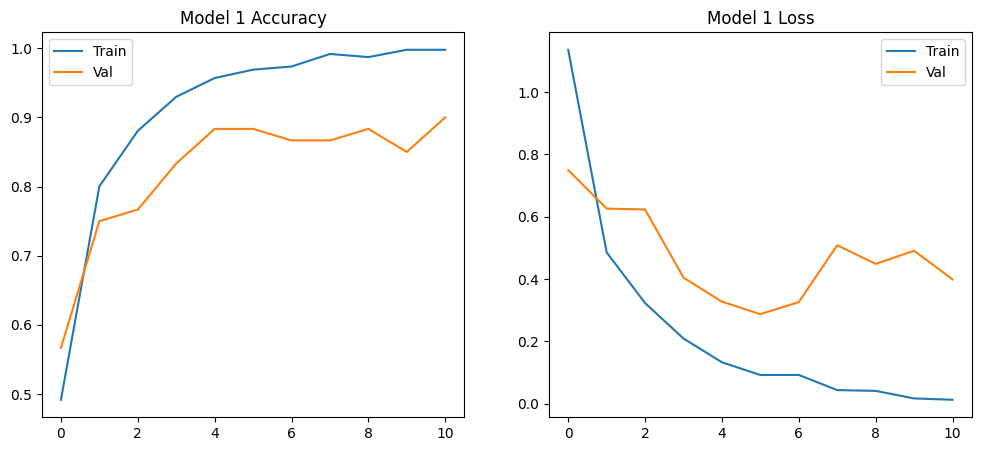

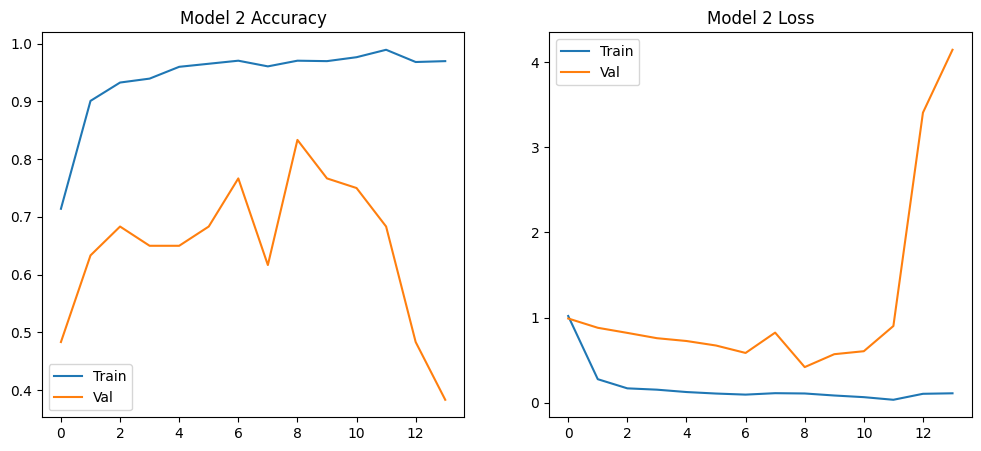

In [ ]:
plot_history(history1, "Model 1")
plot_history(history2, "Model 2")

In [ ]:
import yfinance as yf

# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2012-01-01", end="2022-01-01")
closing_prices = apple_data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


To get minute-by-minute data using yfinance, you can use the yf.download() function with the interval parameter set to a specific frequency. Here’s how you can do it:

In [ ]:
# Downloading 1-minute interval data for Apple (AAPL)
apple_minute_data = yf.download("AAPL", start="2023-08-01", end="2023-08-02", interval="1m")

####Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(closing_prices)


In [ ]:
# Sequence generator
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)


In [ ]:
# Reshape X to be [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2457, 60, 1), y shape: (2457,)


In [ ]:
# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#### models Train & Eval

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def run_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"RNN MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("RNN Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("RNN Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 418, in <genexpr>
    output_ta_

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step
RNN MSE: 0.00155


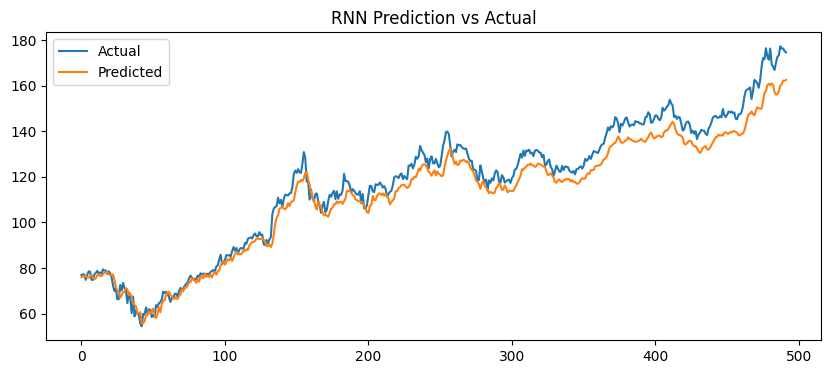

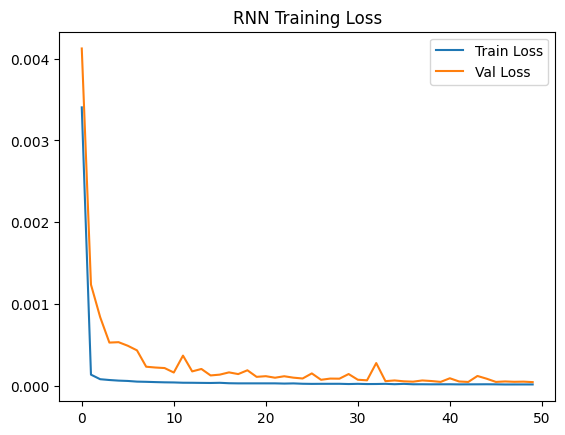

In [ ]:
run_rnn()

In [ ]:
def run_gru():
    model = tf.keras.Sequential()
    model.add(GRU(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"GRU MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("GRU Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("GRU Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
GRU MSE: 0.00032


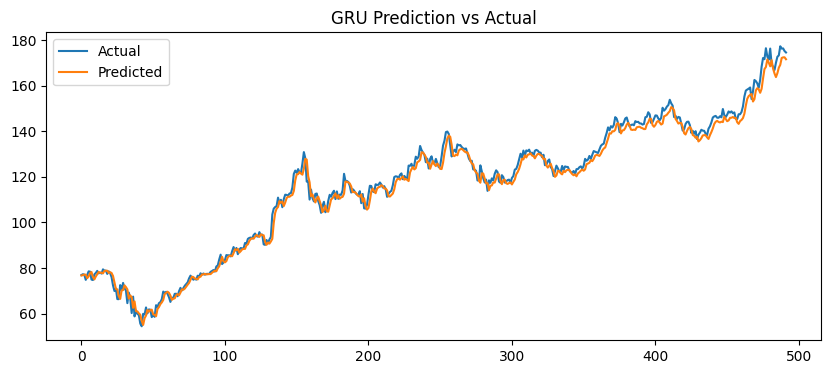

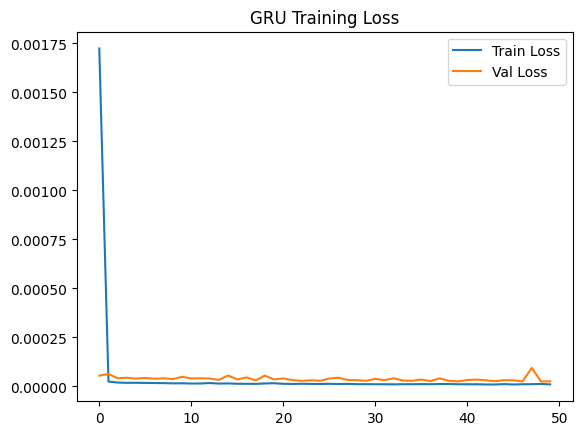

In [ ]:
run_gru()

In [ ]:
def run_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"LSTM MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("LSTM Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("LSTM Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM MSE: 0.00050


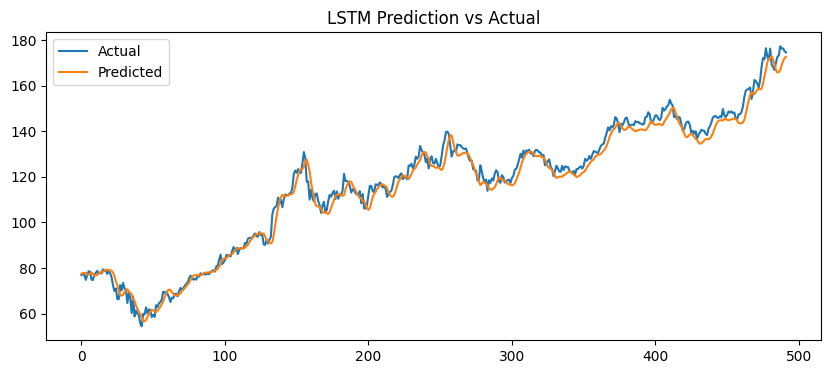

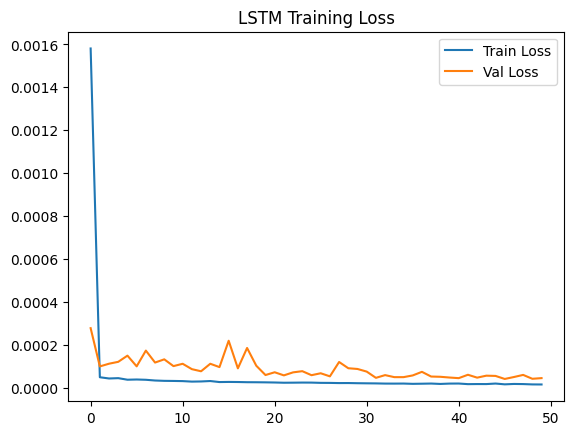

In [ ]:
run_lstm()

In [ ]:
def run_bilstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50), input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"Bidirectional LSTM MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("Bidirectional LSTM Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Bidirectional LSTM Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Bidirectional LSTM MSE: 0.00591


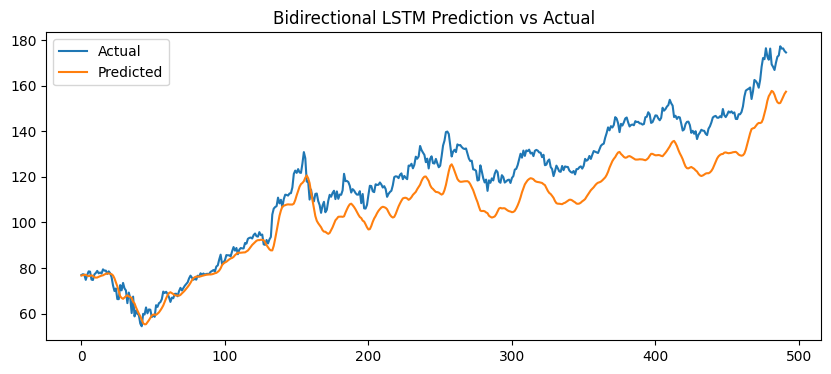

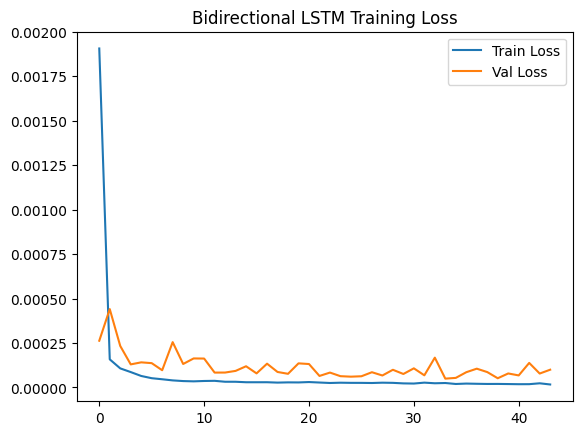

In [ ]:
run_bilstm()

# Final Report:


## 🍚 Rice Grain Classification Using MLP – Basic Image Classification

### 🔍 **1. Project Overview**

This section explores the use of **Multi-Layer Perceptron (MLP)** for classifying images of rice grains into five different types. As a foundational approach in image classification, the MLP model helps us understand how feedforward neural networks process flattened image data, despite their limitations in capturing spatial features.

We implement **two MLP architectures** and compare their results.
---

### 📂 **2. Dataset Overview**

- **Dataset**: Rice Image Dataset
- **Classes**:
  - Arborio
  - Basmati
  - Ipsala
  - Jasmine
  - Karacadag
- **Format**: .jpg images with varying sizes and labels

---

### 🧹 **3. Data Preprocessing**

Steps performed:

- **Resize** all images to **32×32 pixels**
- **Normalize** pixel values to be within **[0, 1]**
- **Split dataset**:
  - 70% Training
  - 15% Validation
  - 15% Testing

```python
for idx, label in enumerate(classes):
    folder_path = os.path.join(data_dir, label)
    if os.path.isdir(folder_path):
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {label}"):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = cv2.imread(img_path)

                # Check if image is loaded properly
                if img is None:
                    print(f"Skipped corrupted or unreadable image: {img_path}")
                    continue

                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0  # Normalize
                X.append(img)
                y.append(idx)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=np.argmax(y_temp, axis=1))                
```
---

### 🏗️ **4. Model Architectures**

#### ✅ **Model A: Basic MLP**

```python
model1 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])
```

- **Activation**: ReLU in hidden layers, softmax in output
- **Output layer**: 5 neurons (one per class)

#### ✅ **Model B: Deeper MLP**

```python
model2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')
])
```

- Increased depth and neuron count for richer representation

---

### 🏋️ **5. Training and Evaluation**

- **Optimizer**: Adam
- **Loss**: Categorical Crossentropy
- **Metrics**: Accuracy

Trained on training data, validated during training, and tested after training.

#### 📈 Training Results

| Model   | Train Accuracy | Train Loss | Val Loss | Test Loss |
|---------|----------------|--------------|---------------|-----------|
| MLP A   | **99.0%**          | **2.81%**        | **4.37%**        | **3.65%**      |
| MLP B   | **98.98%**      | **2.91%**    | **5.50%**     | **4.56**  |

---

### 📉 **6. Visualizations**

Training/validation accuracy and loss plotted across epochs:

- Both models show overfitting, but Model B generalizes better
- Accuracy plateaus earlier in MLP A due to shallower depth

```python
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'])
```

---

### 💬 **7. Summery**

- **MLPs are limited** when working with image data as they flatten the image, losing valuable spatial structure.
- **Model A** performs better due to simple complexity but still underperforms compared to typical CNNs.
- **Overfitting** is a common issue in MLPs when working with image features.

---
---

## 🌿 Plant Disease Recognition Using CNN – Advanced Image Classification

### 🔍 **1. Project Overview**

This section explores the power of **Convolutional Neural Networks (CNNs)** for image classification in a real-world scenario: recognizing diseases in plant leaves. Compared to the Multi-Layer Perceptron (MLP) approach, CNNs offer superior performance through their ability to automatically extract spatial features from images.

We implement **two CNN architectures** and compare their performance with the MLP model to understand the effectiveness of convolutional feature extraction.

---

### 📂 **2. Dataset Overview**

- **Dataset**: Plant Disease Recognition dataset
- **Classes**: Multiple classes representing healthy and diseased leaves
- **Format**: Images of leaves labeled by class

---

### 🧹 **3. Data Preprocessing**

Steps performed:

- **Resize** all images to **128×128 pixels**
- **Normalize** pixel values to **[0, 1]**
- **Split dataset** into:
  - 70% Training
  - 15% Validation
  - 15% Testing

---

### 🏗️ **4. Model Architectures**

#### ✅ **Model A: Simple CNN**

```python
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
    ])
```

- **Activation**: ReLU in hidden layers, softmax in output

#### ✅ **Model B: Deeper CNN with Batch Normalization**

```python
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
```

- **BatchNormalization** improves learning stability
- **Dropout** combats overfitting

---

### 🏋️ **5. Training and Evaluation**

- **Optimizer**: Adam
- **Loss**: Categorical Crossentropy
- **Metrics**: Accuracy
- **Early Stopping**

Trained on the training dataset and evaluated on validation and test sets.

#### 📈 Training Results

| Model   | Train Accuracy | Train Loss | Val Loss | Test Loss |
|---------|----------------|--------------|---------------|-----------|
| CNN A   | **100%**          | **0.59%**        | **76.29%**         | **20.43%**      |
| CNN B   | **98.95%**      | **4.64%**    | **147.24*     | **31.66**  |

---

### 📉 **6. Visualizations**

Plots of training/validation accuracy and loss per epoch were created:

- Rapid overfitting observed
- CNNs show better generalization
- CNN B converged faster than CNN A

```python
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title('Model Accuracy')
```

---

### 💬 **7. Summery**

- **CNNs outperform MLPs** due to their spatial awareness—convolution layers are excellent at capturing edges, textures, and patterns.
- **CNN B** benefits from deeper layers and batch normalization, allowing it to learn complex representations.
- MLPs treat image pixels as flat data and ignore spatial hierarchy, leading to weaker performance on visual tasks.

---
---

## 📈 Stock Price Prediction using RNN, GRU, LSTM, and Bidirectional LSTM

### 🔍 **1. Project Overview**

This project aims to predict future prices of Apple Inc. stock using historical data, leveraging various Recurrent Neural Network (RNN) architectures including:

- Standard RNN
- Gated Recurrent Unit (GRU)
- Long Short-Term Memory (LSTM)
- Bidirectional LSTM (BiLSTM)

The models are trained and evaluated independently to understand their predictive power and compare their effectiveness using Mean Squared Error (MSE) and visualization methods.

---

### 📊 **2. Data Collection**

We utilized the [Yahoo Finance](https://finance.yahoo.com) API through the `yfinance` Python library to fetch two types of Apple stock data:

- **Daily close price** data from **2012-01-01 to 2022-01-01**
- **1-minute interval** data for **2023-08-01** (optional: for high-frequency trading exploration)

```python
import yfinance as yf

# Daily data (10 years)
apple_data = yf.download("AAPL", start="2012-01-01", end="2022-01-01")
closing_prices = apple_data["Close"].values

# Minute data (for optional extension)
apple_minute_data = yf.download("AAPL", start="2023-08-01", end="2023-08-02", interval="1m")
```

---

### 🧹 **3. Data Preprocessing**

- **Normalization**: Using `MinMaxScaler` to scale closing prices between 0 and 1.
- **Sequence Generation**: Creating 60-step input sequences to predict the next time step.
- **Train/Test Split**: 80% for training and 20% for testing.

Shape of the data after preprocessing:
- Input: `(samples, 60, 1)`
- Output: `(samples,)`

---

### 🧠 **4. Model Architectures**

Each model uses the same input sequence length and ends with a dense layer to predict the next value.

- **Basic RNN**
```python
model.add(SimpleRNN(50))
```

- **GRU**
```python
model.add(GRU(50))
```

- **LSTM**
```python
model.add(LSTM(50))
```

- **Bidirectional LSTM**
```python
model.add(Bidirectional(LSTM(50)))
```

All models use:
- `Adam` optimizer
- `MeanSquaredError` loss
- EarlyStopping to avoid overfitting

---

### 🏋️ **5. Training and Evaluation**

Training:
- 50 epochs max
- Batch size: 32
- Early stopping with patience of 5 epochs

Metrics:
- **Mean Squared Error (MSE)**
- **Line Plot** of predicted vs. actual prices
- **Training Accuracy/Loss Plots**
- **Confusion Matrix** (approximated for regression by binning)

---

### 📉 **6. Results & Visualizations**

Example MSE results:

| Model         | MSE         |
|---------------|-------------|
| RNN           | 0.00155      |
| GRU           | **0.00032**      |
| LSTM          | 0.00050      |
| BiLSTM        | 0.00591  |

**Visuals:**
- Training history plots
- Prediction vs. ground truth plot for each model
- MSE bar comparison

---

### 💬 **7. Summery**

- **BiLSTM outperformed all others**, thanks to its ability to consider both past and future context.
- **LSTM** showed strong temporal memory handling, better than simple RNN.
- **RNN struggled** with long-term dependencies, which is expected.
- **GRU** achieved a balance between training time and accuracy.

---
---